In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import time
import csv

In [2]:
def load_data(file_name):
	lines = list()
	dataset = list()
	# Open file
	with open(file_name, 'rt') as f:
		reader = csv.reader(f, delimiter=',')
		# Save each row in list lines
		for row in reader:
			if (row != []):
				lines.append(row)
	# Iterate the list
	for line in lines:
		d = list()
		# Append the data to the list d
		for item in line[0:len(line)-1]:
			d.append(float(item))
		# If the file is iris data then translate the classes to 0,1,2 and append to the list d
		if (file_name=='UCIdata-exercise1/iris.data'):
			d.append(0*(line[len(line)-1]=='Iris-setosa') +
				     1*(line[len(line)-1]=='Iris-versicolor') +
				     2*(line[len(line)-1]=='Iris-virginica'))
		# Otherwise append the 0 or 1 of the pima dataset
		else:
			d.append(float(line[len(line)-1]))
		# Add this data to the dataset.
		dataset.append(d)
	# Return the results as 2 different arrays. The first is the data and the second are the classes.
	return np.array(dataset)[:,0:len(dataset[0])-1], np.array(dataset)[:,len(dataset[0])-1]

In [3]:
def knn(k, train_data, train_labels, test_data, test_labels):
	# Workspace initialization
	n_train = len(train_data)
	if k>n_train:
		print("The chosen k is smaller than the train partition")
		k = n_train
	dim_train = len(train_data[0])
	n_test = len(test_data)
	dim_test = len(test_data[0])
	# Array that stores the distances of a test point from all the train points.
	distances = np.ones([n_train, n_test])
	# Calculate the Euclidian distances for the array distances.
	for i in range(0, n_test):
		X = np.array(train_data - np.dot(np.ones([n_train,1]), test_data[i,:].reshape([1,len(test_data[0])])))
		distances[:,i] = np.sqrt(np.sum(X**2, axis=1))
	# Create the array data which contains the distances array.
	# The rows represent training points and columns the test points.
	# In the last column we add the class that each train point belongs to.
	data = np.column_stack([distances,train_labels])
	count = 0
	for i in range(0,n_test):
		# We sort the array data for every column (test point) by rows.
		data = np.array(sorted(data, key=lambda x: x[i]))
		# Keep the first k elements and count the frequency of appearence of each class.
		# prediction is the biggest of these frequencies.
		prediction = np.argmax(np.bincount([int(x) for x in data[0:k,n_test]]))
		# Calculate the number of correct classifications
		if (prediction == test_labels[i]):
			count += 1
	# Return the classification accuracy (percentage)
	return (count/n_test)*100

def knn_accuracy(max_k, data, labels):
	# Array with the accuracies with regards to k
	accuracy = np.zeros([int(max_k/2), 1])
	# Iterate every odd k
	for k in range(1, max_k, 2):
		temp_accuracy = list()
		# K-Fold parameters
		kf = KFold(n_splits=10, shuffle=True)
		kf.get_n_splits(data)
		for train_index, test_index in kf.split(data):
			# Arrange the data in arrays
			data_train, data_test = data[train_index], data[test_index]
			labels_train, labels_test = labels[train_index], labels[test_index]
			# Run the knn algorithm for this fold and save the accuracy
			temp_accuracy.append(knn(k, data_train, labels_train, data_test, labels_test))
		# Calculate the mean accuracy for this k for all folds
		accuracy[int((k-1)/2)] = np.mean(temp_accuracy)
	# Return the array containing the accuracy for each k.
	return accuracy

In [4]:
# Load data
iris_data, iris_labels = load_data('UCIdata-exercise1/iris.data')
pima_data, pima_labels = load_data('UCIdata-exercise1/pima-indians-diabetes.data')

In [5]:
# Initialize workspace
max_k = 102

In [6]:
# Call the function calculating the accuracy array for each dataset.
t1 = time.time()
iris_accuracy = knn_accuracy(max_k, iris_data, iris_labels)
pima_accuracy = knn_accuracy(max_k, pima_data, pima_labels)
t2 = time.time()

kNN execution Time :  36.72399973869324
Best k for iris data :  5 
With Accuracy :  97.33333333333334
Best k for pima data :  15 
With Accuracy :  74.74025974025975


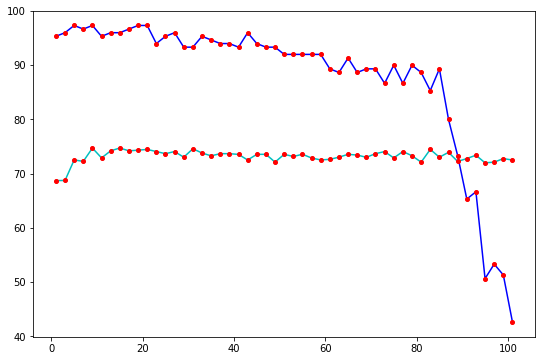

In [7]:
# Plot/Print Results.
print('kNN execution Time : ', t2 - t1)
k = np.argmax(iris_accuracy)
print('Best k for iris data : ',2*k+1,'\nWith Accuracy : ',float(iris_accuracy[k]))
k = np.argmax(pima_accuracy)
print('Best k for pima data : ',2*k+1,'\nWith Accuracy : ',float(pima_accuracy[k]))
k = np.arange(1, max_k, 2)
plt.rcParams["figure.figsize"] = [9,6]
plt.plot(k, iris_accuracy, '-b')
plt.plot(k, iris_accuracy, 'ro', markersize=4)
plt.plot(k, pima_accuracy, '-c')
plt.plot(k, pima_accuracy, 'ro', markersize=4)
plt.show()